<a href="https://colab.research.google.com/github/ZhuoquanChen/Data-Science-Projects/blob/main/Setiment_Analysis_NLP/Setiment_Analysis_for_Alexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
I worked as a Data Scientist in Amazon. Currently, the Products Department collected extensive data on the text reviews of their products at alexa from global customers. Based on this data, the Product Department would like me to build a model to predict whether customers are satisfied with the products or not.

# **SkillS**
- NLP (Natural Language Processing)
- Features Extraction with CountVectorizer
- Data Visualization
- Sampling
- Naive Bayes Classifiers & Logistic Regression Classifiers
- GridSearchCV
- Confusing Matrix

# **Data Sourse**
https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# Import Libraries & Load Data

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [518]:
path = '/content/drive/MyDrive/Colab Notebooks/datasets/Data_Scieence_Business_Projects/Setiment_Analysis_NLP/amazon_alexa.tsv'

alexa_df = pd.read_csv(path, sep='\t')
alexa_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [519]:
alexa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [520]:
alexa_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# Exploratory Data Aynlysis

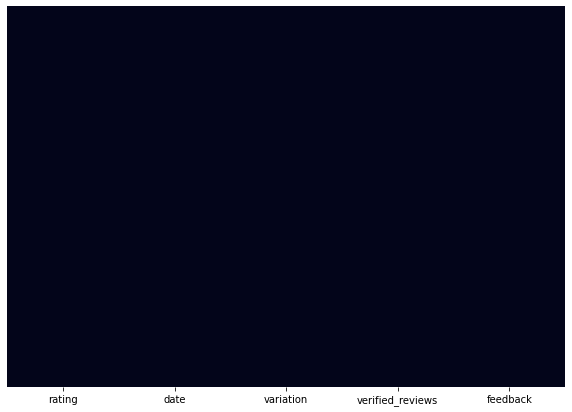

In [521]:
# Wether Missing Data

plt.figure(figsize=(10, 7))
sns.heatmap(alexa_df.isnull(), yticklabels=False, cbar=False);

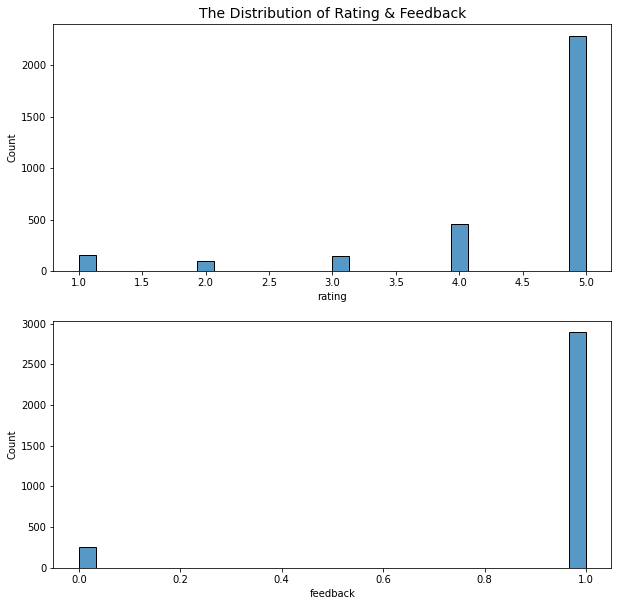

In [522]:
# Numeric Data Distribution

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.histplot(alexa_df['rating'], bins=30)
plt.title('The Distribution of Rating & Feedback', fontdict={'fontsize': 14})

plt.subplot(2, 1, 2)
sns.histplot(alexa_df['feedback'], bins=30);

In [523]:
# Length of verified_reviews

alexa_df['length'] = alexa_df['verified_reviews'].apply(len)
alexa_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


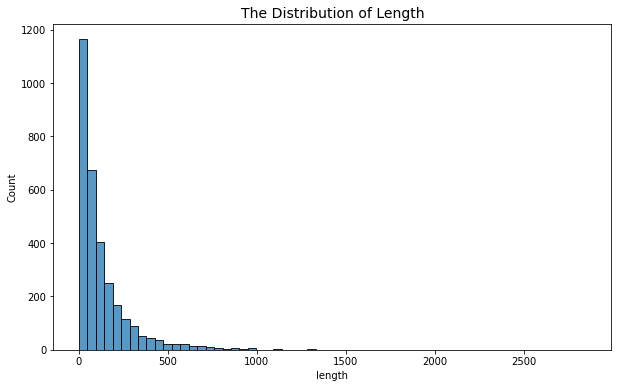

In [524]:
plt.figure(figsize=(10, 6))

sns.histplot(alexa_df['length'], bins=60)
plt.title('The Distribution of Length', fontdict={'fontsize': 14});

In [525]:
alexa_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [526]:
# The longest verified_reviews

alexa_df[alexa_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [527]:
# The shortest verified_reviews

alexa_df[alexa_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [528]:
# See how many positive feedback

positive = alexa_df[alexa_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [529]:
# See how many negative feedback

negative = alexa_df[alexa_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


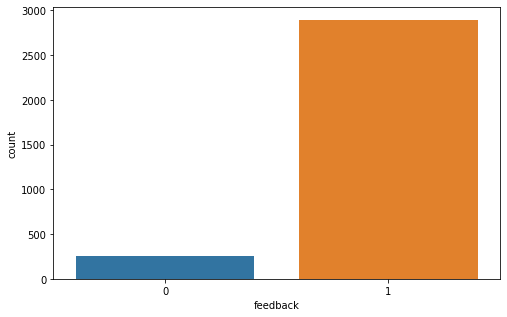

In [530]:
# See how many positive and negative

plt.figure(figsize=(8, 5))
sns.countplot(x=alexa_df['feedback']);

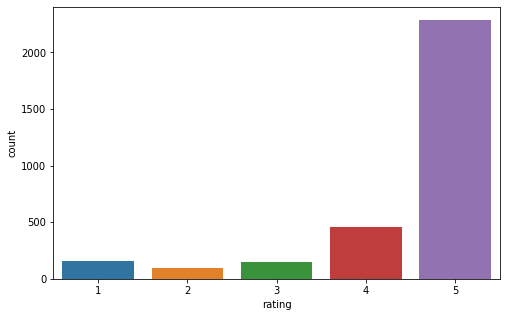

In [531]:
# See the rating status for each

plt.figure(figsize=(8, 5))
sns.countplot(x=alexa_df['rating']);

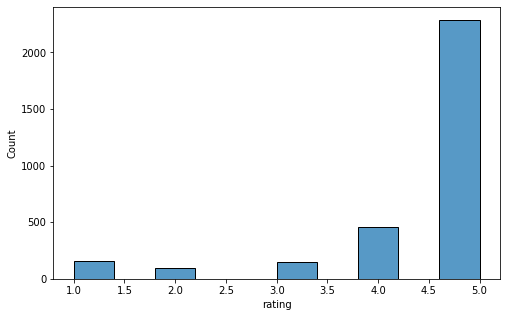

In [532]:
# See the rating distribution

plt.figure(figsize=(8, 5))
sns.histplot(alexa_df['rating'], bins=10);

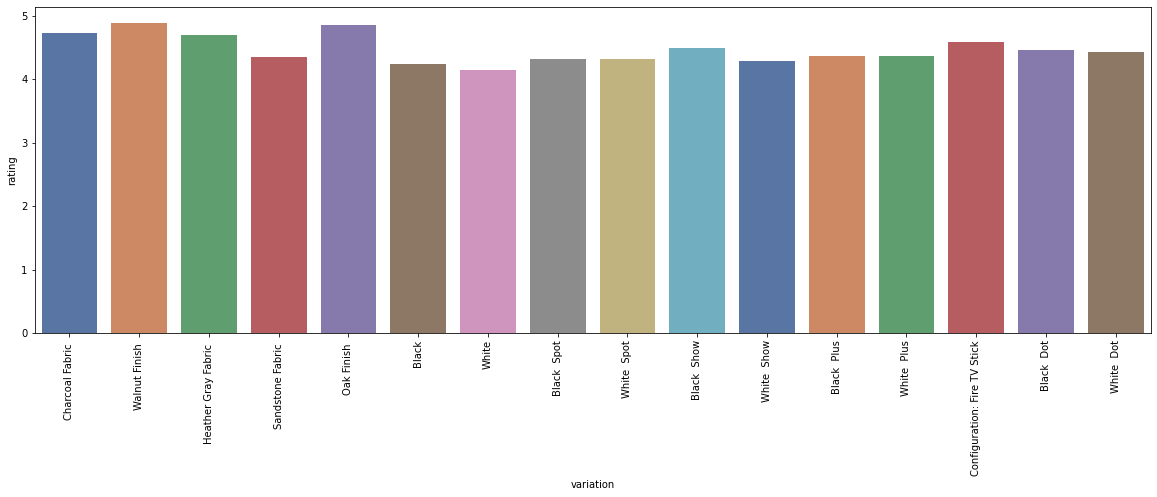

In [533]:
# See the rating of each product in alexa

plt.figure(figsize=(20, 6))
sns.barplot(x='variation', y='rating', data=alexa_df, palette='deep', ci=0)
plt.xticks(rotation=90);

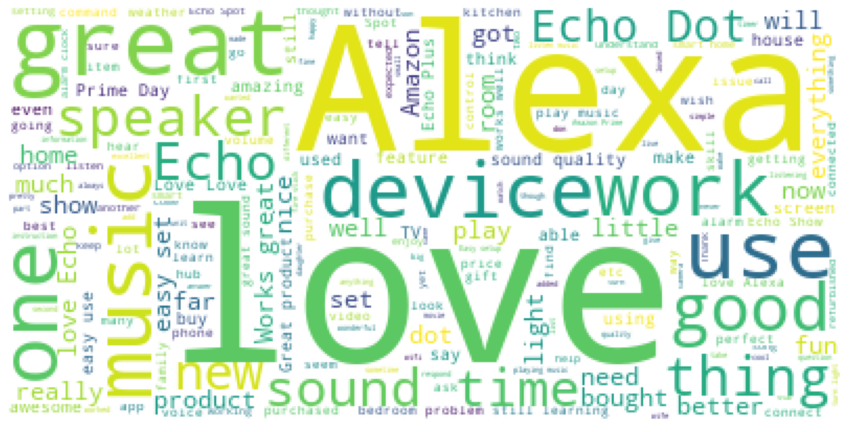

In [534]:
# WordCloud to see the top frequency of the words appear in the text

# for positive
# Put all text in a list
positive_word = positive['verified_reviews'].tolist()
# join all sentence together
all_positive_word =" ".join(positive_word)

from wordcloud import WordCloud

# def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
#     h = int(360.0 * 45.0 / 255.0)
#     s = int(100.0 * 255.0 / 255.0)
#     l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

#     return "hsl({}, {}%, {}%)".format(h, s, l)

wc = WordCloud(background_color='white').generate(all_positive_word)

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off');

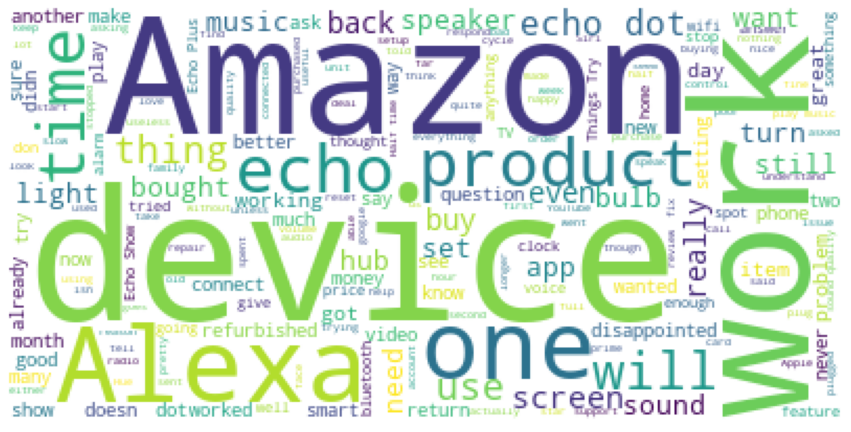

In [535]:
# for negative
# Put all text in a list
negative_word = negative['verified_reviews'].tolist()
# join all sentence together
all_negative_word =" ".join(negative_word)

from wordcloud import WordCloud

wc_n = WordCloud(background_color='white').generate(all_negative_word)

plt.figure(figsize=(15,10))
plt.imshow(wc_n)
plt.axis('off');

# Data Cleaning

In [536]:
# Drop some useless columns

alexa_df.drop(columns=['date', 'rating', 'length'], inplace=True)

In [537]:
alexa_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [538]:
# One hot encoding 'variation' cloumn since there different products

variation_dummies = pd.get_dummies(alexa_df['variation'], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [539]:
# Drop 'variation' column in alexa_df

alexa_df.drop(columns='variation', axis=1, inplace=True)

In [540]:
# Concat alexa_df and vatiation_dimmies

alexa_df = pd.concat([alexa_df, variation_dummies], axis=1)
alexa_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [541]:
# Import NLP associated libraries

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [542]:
# Text cleaning function: remove punctuation

def punc_clean(text):
  text_lower = text.lower()
  punc_remove = [char for char in text_lower if char not in string.punctuation]
  punc_remove = ''.join(punc_remove)

  return punc_remove

In [543]:
alexa_df['verified_reviews'] = alexa_df['verified_reviews'].apply(punc_clean)
alexa_df['verified_reviews']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [544]:
# Text cleaning fuction: stemmer --> unify the form of stems, stemmed and stemming to stem

from nltk.stem import PorterStemmer

def stem_clean(text):
  # instantiate a stemmer
  stemmer = PorterStemmer()
  stem_remove = ''
  for word in text.split(' '):
    stem_remove += (stemmer.stem(word) + ' ') #stems each word and adds to empty stem_remove
  
  return stem_remove

In [545]:
alexa_df['verified_reviews'] = alexa_df['verified_reviews'].apply(stem_clean)
alexa_df['verified_reviews']

0                                           love my echo 
1                                                love it 
2       sometim while play a game you can answer a que...
3       i have had a lot of fun with thi thing my 4 yr...
4                                                  music 
                              ...                        
3145        perfect for kid adult and everyon in between 
3146    listen to music search locat check time look u...
3147    i do love these thing i have them run my entir...
3148    onli complaint i have is that the sound qualit...
3149                                                good 
Name: verified_reviews, Length: 3150, dtype: object

# Data Balance

In [546]:
alexa_df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [547]:
alexa_neg_df = alexa_df[alexa_df['feedback'] == 0]

In [548]:
alexa_neg_df = alexa_neg_df.sample(2500, replace=True)

In [549]:
alexa_df_balance = pd.concat([alexa_df, alexa_neg_df], axis = 0).reset_index(drop=True)
alexa_df_balance

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,love my echo,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,love it,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,sometim while play a game you can answer a que...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,i have had a lot of fun with thi thing my 4 yr...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,when you think about it thi realli doesn’t do ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5646,got thi a few month ago with the idea that it ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5647,doesnt use appl music it is worthless to me w...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,ive alreadi return it,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [550]:
alexa_df_balance = alexa_df_balance.sample(frac=1).reset_index(drop=True)
alexa_df_balance

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,item return for repair receivd item back from ...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,i wa suppos to get the “free” lightbulb with p...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,i have two one in my comput room and the other...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,the first one quit work shortli after i got it...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,love alexa bought other for friend,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,it constantli buffer to the point where you ca...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5646,i jump on the bandwagon by purchas an echo i ...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5647,the echo doe not link to direct tv even though...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,it work great but the reason im leav 3 star is...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [551]:
alexa_df_balance['feedback'].value_counts()

1    2893
0    2757
Name: feedback, dtype: int64

# CountVectorizer

In [552]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')
cvec_text = pd.DataFrame(cvec.fit_transform(alexa_df_balance['verified_reviews']).todense(), 
                         columns=cvec.get_feature_names())
cvec_text

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,129,12am,15,150,19,1964,1990,1gb,1rst,1st,20,200,2000,2017,2030,229,23,2448,247,24ghz,25,29,299,2999,2nd,2or,2origin,2packag,30,300,...,worth,worthi,worthless,wouldn,wouldnt,wow,write,wrong,xbox,xfiniti,xm,yale,yard,ye,yeah,year,yearold,yell,yellow,yep,yesterday,yhe,york,you1,youd,youll,young,younger,youngest,youtub,youtubeit,yr,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Split

In [553]:
y = alexa_df_balance['feedback']
y

0       0
1       1
2       1
3       0
4       1
       ..
5645    0
5646    1
5647    0
5648    1
5649    1
Name: feedback, Length: 5650, dtype: int64

In [554]:
# Since 'verified_reviews' has been encoding above so delete this column in the alexa_df_balance table

alexa_df_balance.drop(columns=['verified_reviews', 'feedback'], axis=1, inplace=True)

In [555]:
alexa_df_balance

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [556]:
# Conta alexa_df_balance and cvec_text as the final table

X = pd.concat([alexa_df_balance, cvec_text], axis=1)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,129,12am,15,150,19,1964,1990,1gb,1rst,1st,20,200,2000,2017,2030,...,worth,worthi,worthless,wouldn,wouldnt,wow,write,wrong,xbox,xfiniti,xm,yale,yard,ye,yeah,year,yearold,yell,yellow,yep,yesterday,yhe,york,you1,youd,youll,young,younger,youngest,youtub,youtubeit,yr,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5645,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [557]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Modeling

## 1. Naive Bayse

In [558]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [559]:
# The score in training set

nb.score(X_train, y_train)

0.9383059418457649

In [560]:
# The score in testing set

nb.score(X_test, y_test)

0.9179941002949853

## 2. Logistic Regression

In [567]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [568]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9734513274336283, 0.9474926253687316)

In [571]:
# GridSearch parameters

from sklearn.model_selection import GridSearchCV

params = { 'C': [0.4, 0.5, 0.6], 'penalty': ['l2']}

gs = GridSearchCV(lr, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.4, 0.5, 0.6], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [572]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9709228824273072, 0.943952802359882)

In [573]:
preds_lr = lr.predict(X_test)
preds_lr

array([0, 0, 1, ..., 0, 0, 0])

In [575]:
from sklearn.metrics import accuracy_score

print('Accuracy {}'.format(accuracy_score(preds_lr, y_test)))

Accuracy 0.9474926253687316


# Evaluation

## 1. Navie Bayse

In [561]:
# Get prediction

preds = nb.predict(X_test)

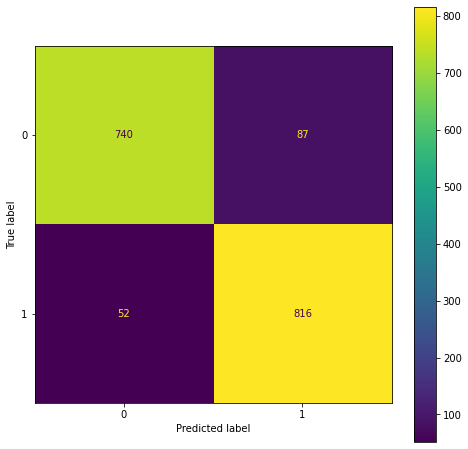

In [562]:
# Confusing Matrix for evaluating the performance of the model

# Saving the value into confusing matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# plot
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(nb, X_test, y_test, cmap='viridis', values_format='d', ax=ax);

In [563]:
# Calculate the sencitivity

recall = tp / (tp + fn)
print('Recall:', recall)

Recall: 0.9400921658986175


In [564]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       827
           1       0.90      0.94      0.92       868

    accuracy                           0.92      1695
   macro avg       0.92      0.92      0.92      1695
weighted avg       0.92      0.92      0.92      1695



## 2. Logistic Regression

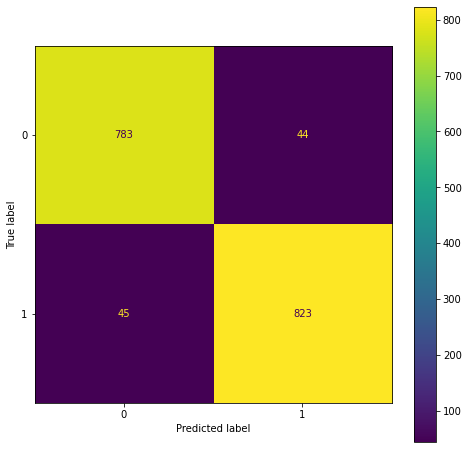

In [576]:
# Saving the value into confusing matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds_lr).ravel()

# plot
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap='viridis', values_format='d', ax=ax);

In [577]:
# Calculate the sencitivity

recall = tp / (tp + fn)
print('Recall:', recall)

Recall: 0.9481566820276498


In [578]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       827
           1       0.90      0.94      0.92       868

    accuracy                           0.92      1695
   macro avg       0.92      0.92      0.92      1695
weighted avg       0.92      0.92      0.92      1695

